In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 🔷 Style
sns.set(style="whitegrid")

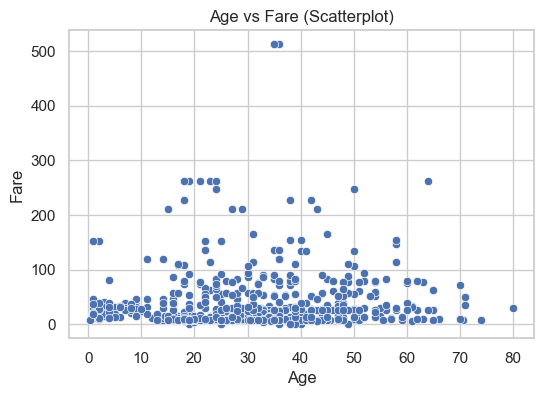

In [4]:
# 1️⃣ Numerical ↔ Numerical (Scatterplot)
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title("Age vs Fare (Scatterplot)")
plt.show()


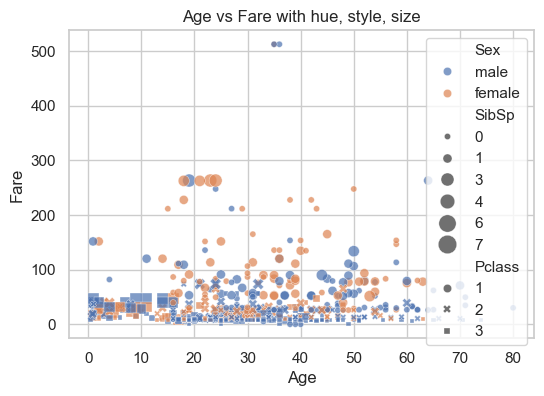

In [6]:
# Scatterplot with multiple information (multivariate)
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Age', y='Fare', data=df,
    hue='Sex', style='Pclass', size='SibSp', sizes=(20,200), alpha=0.7
)
plt.title("Age vs Fare with hue, style, size")
plt.show()

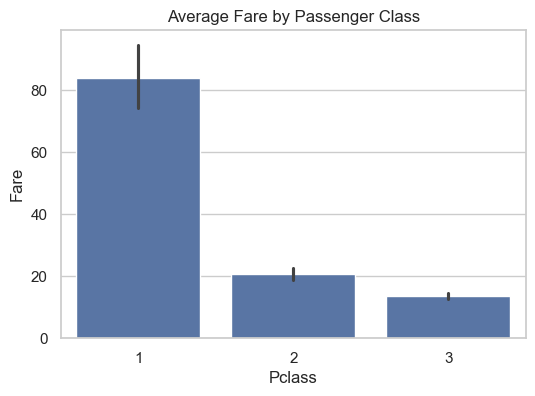

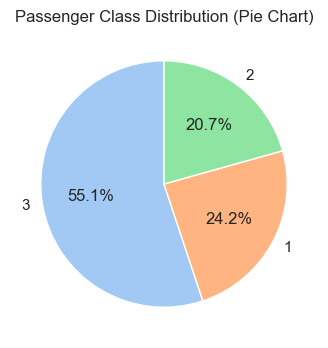

In [8]:
# 2️⃣ Numerical ↔ Categorical (Barplot)
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Fare', data=df)
plt.title("Average Fare by Passenger Class")
plt.show()

# Show in pie chart
plt.figure(figsize=(6,4))
df['Pclass'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Passenger Class Distribution (Pie Chart)")
plt.ylabel('')  # Hide the y-label
plt.show()


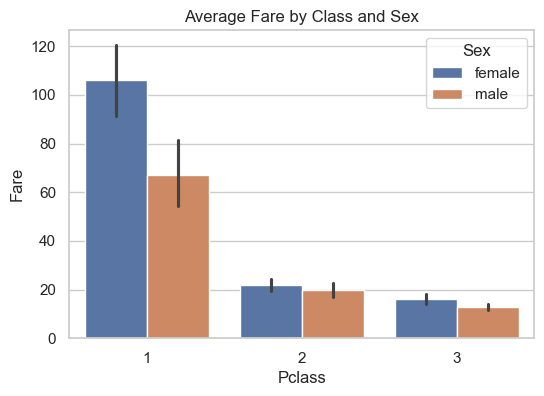

In [9]:
# Barplot with hue
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Fare', data=df, hue='Sex')
plt.title("Average Fare by Class and Sex")
plt.show()

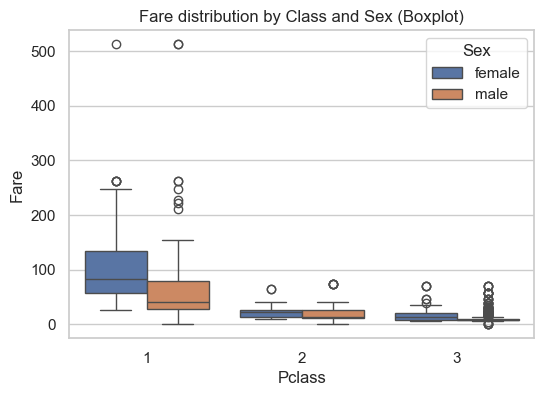

In [10]:
# Boxplot with hue
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass', y='Fare', data=df, hue='Sex')
plt.title("Fare distribution by Class and Sex (Boxplot)")
plt.show()

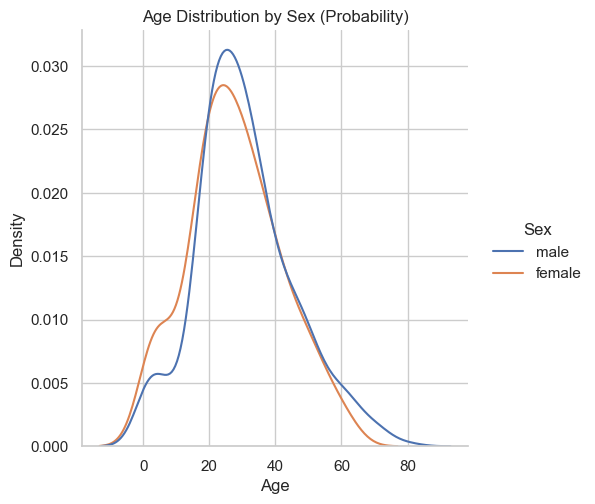

In [12]:
sns.displot(data=df, x="Age", hue="Sex", kind="kde", common_norm=False)
plt.title("Age Distribution by Sex (Probability)")
plt.show()

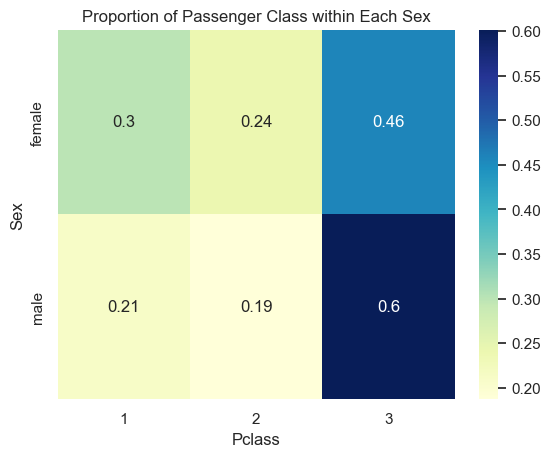

In [13]:
# Crosstab and Heatmap: Sex vs Pclass
cross_tab = pd.crosstab(df['Sex'], df['Pclass'], normalize='index')
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.title("Proportion of Passenger Class within Each Sex")
plt.show()


In [14]:
grouped = df.groupby('Pclass')['Survived'].mean() * 100
print(grouped)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


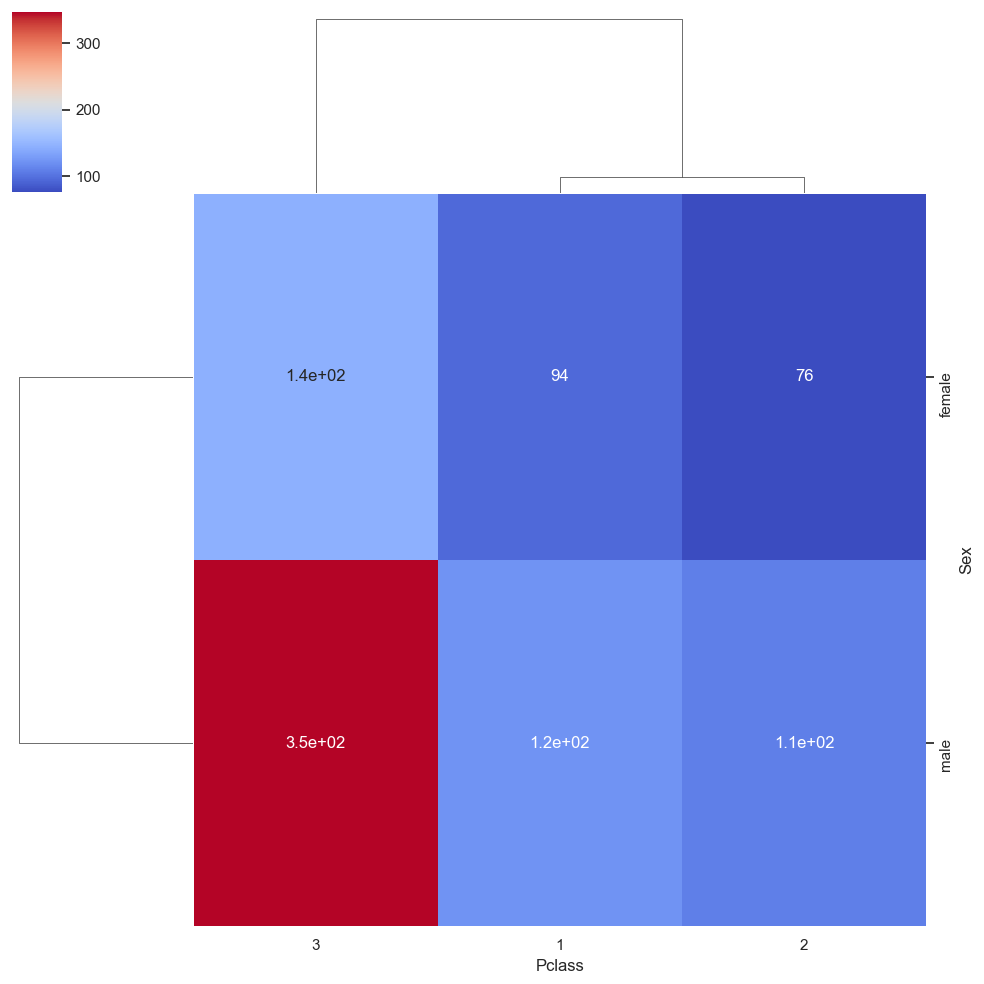

In [16]:
# Cluster Map using Crosstab
cluster_data = pd.crosstab(df['Sex'], df['Pclass'])
sns.clustermap(cluster_data, cmap='coolwarm', annot=True)


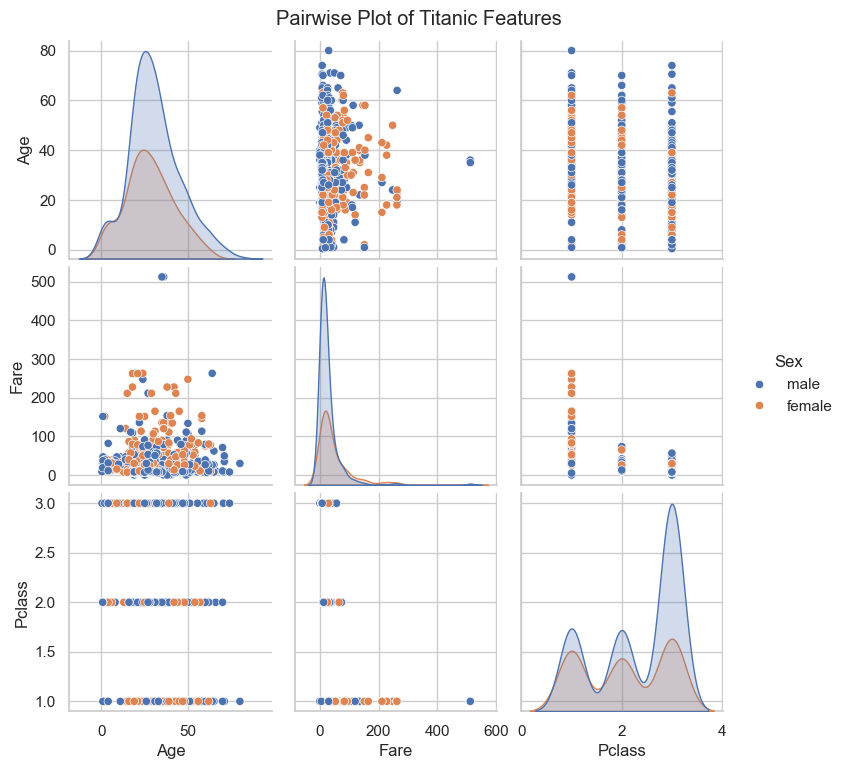

In [17]:
# Pairplot with hue="Sex"
titanic_clean = df.dropna(subset=["Age", "Fare", "Pclass", "Survived"])
sns.pairplot(titanic_clean, vars=["Age", "Fare", "Pclass"], hue="Sex")
plt.suptitle("Pairwise Plot of Titanic Features", y=1.02)
plt.show()


In [22]:
# Heatmap of flights
pivot_table = df.pivot_table(index='PassengerId', columns='Pclass')
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Monthly Passengers over Years (Heatmap)")
plt.show()

# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="PassengerId", y="Age")
plt.title("Passengers Trend Over Years")
plt.show()


TypeError: agg function failed [how->mean,dtype->object]